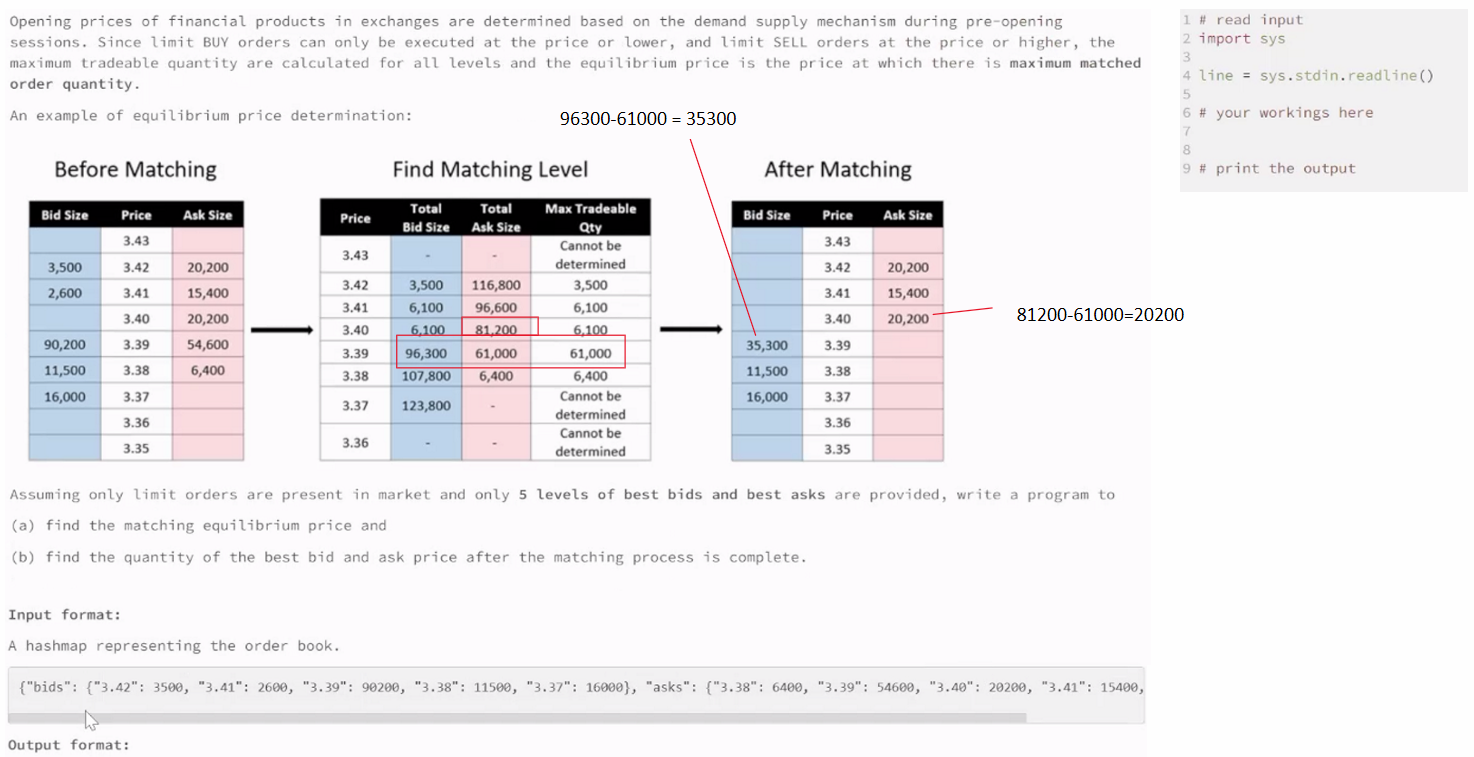
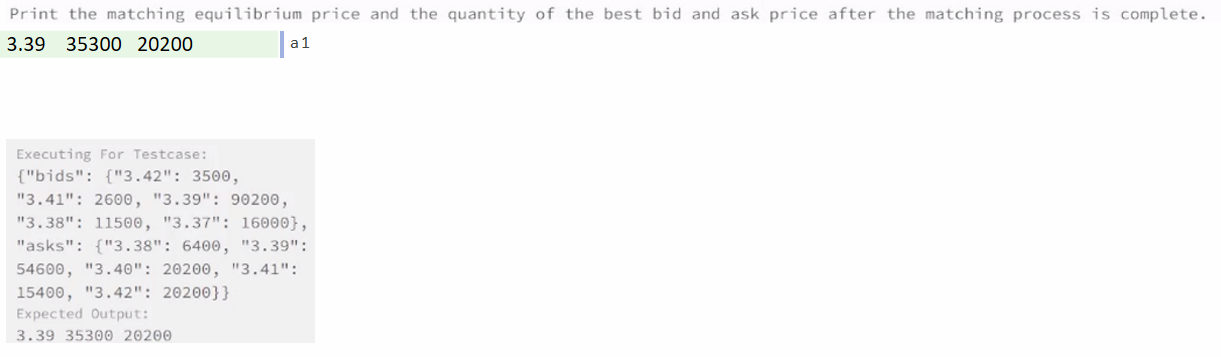

In [92]:
data = {
      "bids": {
        "3.42": 3500,
        "3.41": 2600, 
        "3.39": 90200,
        "3.38": 11500, 
        "3.37": 16000
      },
      "asks": {
        "3.38": 6400, 
        "3.39": 54600, 
        "3.40": 20200, 
        "3.41": 15400, 
        "3.42": 20200
      }
    }

# turn str keys into float keys
bid = {}
for price in data['bids'].keys():
    bid[float(price)] = data['bids'][price]
    
ask = {}
for price in data['asks'].keys():
    ask[float(price)] = data['asks'][price]

bid_price = [float(x) for x in list(data['bids'].keys())]
bid_price = sorted(bid_price, reverse=True)
ask_price = [float(x) for x in list(data['asks'].keys())]
ask_price = sorted(ask_price)
all_price = sorted(set(bid_price + ask_price))

bid_q = {bid_price[0]:bid[bid_price[0]]}
for i in range(1, len(bid_price)):
    prev_price = bid_price[i-1]
    curr_price = bid_price[i]
    bid_q[curr_price] = bid_q[prev_price] + bid[curr_price]
    
ask_q = {ask_price[0]:ask[ask_price[0]]}
for i in range(1, len(ask_price)):
    prev_price = ask_price[i-1]
    curr_price = ask_price[i]
    ask_q[curr_price] = ask_q[prev_price] +ask[curr_price]
    
t_quant = {}
for price in all_price:
    if price not in bid_q or price not in ask_q:
        t_quant[price] = 0
    elif bid_q[price] <= ask_q[price]:
        t_quant[price] = bid_q[price]
    else:
        t_quant[price] = ask_q[price]
        
max_t_quant = max(t_quant.values())
t_quant_inverse = {v:k for k,v in t_quant.items()}
max_quant_price = t_quant_inverse[max_t_quant]

for price in bid_q:
    bid_left = bid_q[price] - max_t_quant
    if bid_left > 0:
        break
            
for price in ask_q:
    ask_left = ask_q[price] - max_t_quant
    if ask_left > 0:
        break
        
print(max_quant_price, bid_left, ask_left)

3.39 35300 20200
